#**KÜTÜPHANELER**

In [1]:
#Matematiksel işlemleri yapmak için Numpy ve Pandas kütüphaneleri kullanılır.
import numpy as np
import pandas as pd

#Görselleştirme kütüphaneleri için matplotlib.pyplot ve seaborn kullanılır.
import matplotlib.pyplot as plt
import seaborn as sns

#Makine öğrenmesi için sklearn kütüphanesi kullanılır.
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

#Derin öğrenme içinde tensorflow kütüphanesi kullanılır.
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

#Hata almamak için warnings kütüphanesi kullanılır.
import warnings
warnings.filterwarnings("ignore")


#**VERİ SETİ** **YÜKLEME**

In [2]:
#Keras içinde hazır veri olan cifar10 datası seçildi
tf.keras.datasets.cifar10

#Cifar10 datasını seçerek 10 Sınıftan oluşan Sınıflandırma üzerinde çalışma gerçekleştireceğiz.
cifar10=tf.keras.datasets.cifar10

#x_train, y_train, x_test, y_testleri load yaparak verileri yükledik
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
#X_train.shape ile verilerin boyutuna ulaştık
X_train.shape

(50000, 32, 32, 3)

In [4]:
#Y_train.shape ile verilerin sınıflandırılmasına bakılır.
y_train.shape

(50000, 1)

In [5]:
#Test verisi
X_test.shape


(10000, 32, 32, 3)

In [6]:
# 50000 tane eğitim, 10000 tane test görüntüsü var.
# Veriler 32*32 piksel boyutunda

#**VERİLERİ** **GÖRSELLEŞTİRME**





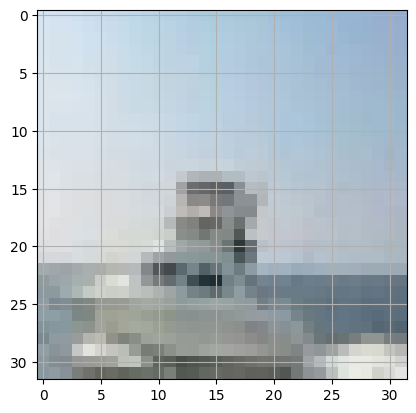

In [7]:
#Verilerimizi Görselleştirelim(Rastgele)

#plt.figure grafiğin boyutunu belirler
plt.figure()

#plt.imshow ile görselleştirme yapılır
#[] parantez içine hangi index numarasını yazarsak onun görüntüsünü gösterir
plt.imshow(X_train[100])

#plt.grid grafiğin arkasına ızgara çizer. Çizdirmek istersek parantez içinde True
#Çizdirmek istemez isek parantez içinde False yazdırılır
plt.grid(True)

#plt.show  grafiği çizdirir
plt.show()

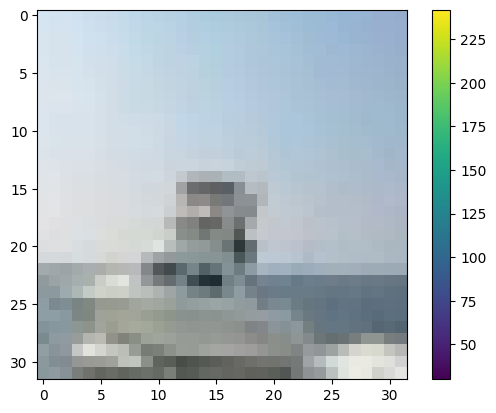

In [8]:
#Verileri renklendirme
plt.figure()
plt.imshow(X_train[100])
#plt.colorbar renklerin ne anlama geldiğini gösterir
plt.colorbar()
plt.grid(False)
plt.show()

#**VERİLERİ** **NORMALLEŞTİRME**

In [ ]:
# Verileri 0-1 arasına sıkıştıracağız
# Neden 255 e bölünür? => En büyük veri 255 olduğu için her bir veriyi 255'e bölüyoruz

X_train = X_train / 255.0

X_test = X_test / 255.0

In [ ]:
## 50 görüntüyü görselleştirelim

plt.figure(figsize=(150,150)) #Görüntü boyutu

for i in range(50):
  #10 satır 5 sütundan 50 görüntü gösterecek
    plt.subplot(10,5,i+1)
    plt.xticks([]) #X kısmındaki etiketler yok edilir
    plt.yticks([]) #Y kısmındaki etiketler yok edilir
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) #Görselleştirme yapılır
plt.show()

# **MAKİNE** **ÖĞRENMESİ** **MODELİ**






In [9]:
X_train.shape[0] #x_train boyutu gösterilir

50000

In [10]:
# Verileri 32x32 görüntü formatından 1024 özellikli vektörlere düzleştirelim

X_train = X_train.reshape(X_train.shape[0], -1) #reshape yeniden boyutlandırır
X_test = X_test.reshape(X_test.shape[0], -1)

## X_train.shape[0] veri setindeki sayıdır,
# Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. 32*32 boyutundaki görüntü 1024 özellikli vektöre dönüştürülür. (32*32=1024)
# Burdaki -1 kalan boyutu otomotik olarak hesaplar.

#Farklı şekillerde de yapabiliriz; (ikisi aynı sonucu verir)

#X_train = X_train.reshape(X_train.shape[0], 32 * 32)
# X_train.reshape(50000,1024)
#X_test = X_test.reshape(X_test.shape[0], 32 * 32)


##*KNN* *Modeli*


In [11]:
?KNeighborsClassifier
#model hakkında detaylı bilgiye ulaşılır.

In [12]:
knn=KNeighborsClassifier().fit(X_train,y_train) #x_train'den y_train'ini öğrenir

In [13]:
#predict tahmin etme
#parantez içine yazacağımız (x_test,y_test, x_train, y_train) üzerinden test verilerini tahmin eder

y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred) #doğruluk skorunu hesaplar
f1=f1_score(y_test,y_pred, average='weighted')  #F1 Skorunu hesaplar.
recall=recall_score(y_test,y_pred, average='weighted') #Geri Çağırma Skorunu hesaplar.
precision=precision_score(y_test,y_pred, average='weighted') #Kesinlik Skorunu hesaplar.

In [14]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.3398
F1 Skoru: 0.3260
Geri Çağırma (Recall): 0.3398
Kesinlik (Precision): 0.4304


*Karmaşıklık* *matrisi*

In [15]:
#cm karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[537,   4, 117,  13,  59,   7,  26,   5, 225,   7],
       [139, 205, 110,  42, 155,  36,  61,  10, 217,  25],
       [107,   3, 452,  52, 226,  34,  66,   8,  49,   3],
       [ 70,   8, 234, 217, 193, 115,  95,  17,  46,   5],
       [ 64,   1, 262,  35, 514,  21,  41,   7,  53,   2],
       [ 71,   3, 227, 155, 187, 220,  66,  14,  51,   6],
       [ 27,   2, 273,  68, 314,  37, 248,   2,  28,   1],
       [ 93,  10, 181,  50, 280,  52,  53, 210,  67,   4],
       [141,  14,  52,  38,  54,  16,  14,   8, 655,   8],
       [153,  67,  98,  68, 124,  23,  46,  29, 252, 140]])

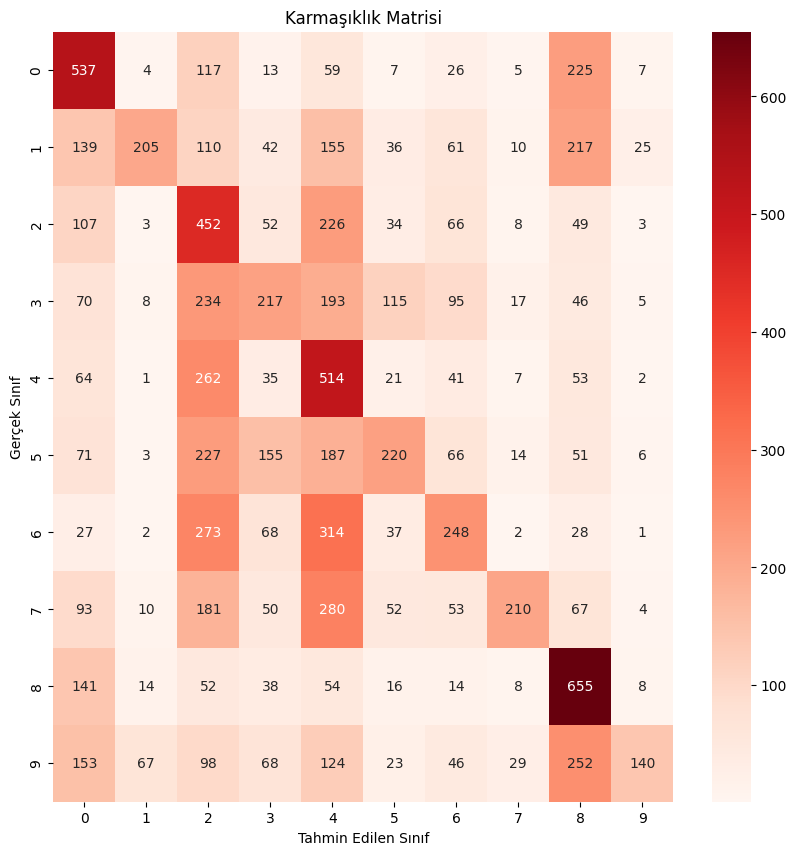

In [16]:
# Karmaşıklık Matrisini Görselleştirme
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

##*Random Forest Modeli*

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred=rf.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted') #
precision=precision_score(y_test,y_pred, average='weighted')

In [19]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.4698
F1 Skoru: 0.4659
Geri Çağırma (Recall): 0.4698
Kesinlik (Precision): 0.4647


In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[573,  34,  53,  20,  36,  14,  24,  25, 159,  62],
       [ 24, 554,   7,  41,  22,  38,  36,  33,  70, 175],
       [104,  46, 329,  84, 138,  65, 104,  73,  27,  30],
       [ 51,  36,  70, 272,  82, 191, 136,  62,  28,  72],
       [ 61,  18, 148,  58, 406,  48, 137,  78,  26,  20],
       [ 39,  30,  79, 151,  84, 389,  83,  86,  25,  34],
       [ 13,  35,  84,  74, 117,  56, 550,  25,   8,  38],
       [ 50,  38,  52,  60,  93,  93,  48, 452,  20,  94],
       [ 82,  87,  22,  31,  14,  35,   9,  18, 623,  79],
       [ 47, 173,  19,  29,  20,  22,  27,  36,  77, 550]])

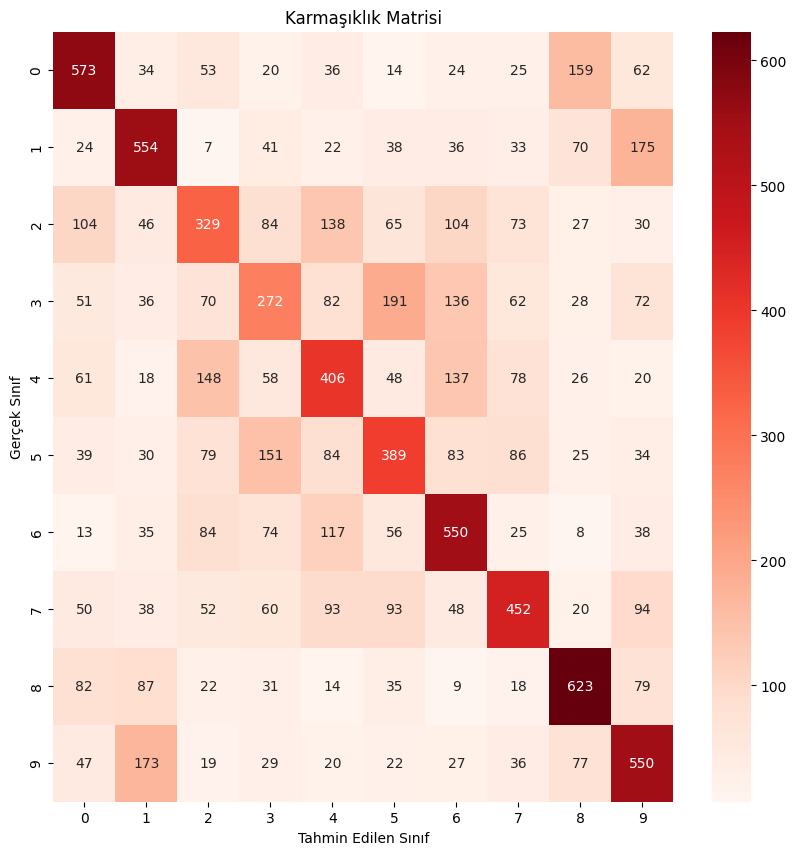

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

##*Karar Ağaçı Modeli*

In [22]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred=dt.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted') #
precision=precision_score(y_test,y_pred, average='weighted')

In [24]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.2722
F1 Skoru: 0.2720
Geri Çağırma (Recall): 0.2722
Kesinlik (Precision): 0.2720


In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[356,  78,  85,  54,  69,  41,  41,  51, 150,  75],
       [ 82, 266,  59,  74,  63,  46,  54,  69, 120, 167],
       [ 90,  52, 224,  91, 149, 111, 108,  91,  39,  45],
       [ 58,  59, 114, 195, 110, 132, 129,  98,  41,  64],
       [ 66,  44, 152,  91, 228, 107, 120, 108,  40,  44],
       [ 53,  59, 119, 154,  91, 215, 113,  91,  54,  51],
       [ 44,  52, 126, 111, 141, 103, 284,  65,  23,  51],
       [ 81,  84,  94,  72, 101, 108,  64, 267,  60,  69],
       [143, 111,  42,  55,  43,  53,  27,  37, 397,  92],
       [ 85, 177,  54,  63,  49,  47,  45,  89, 101, 290]])

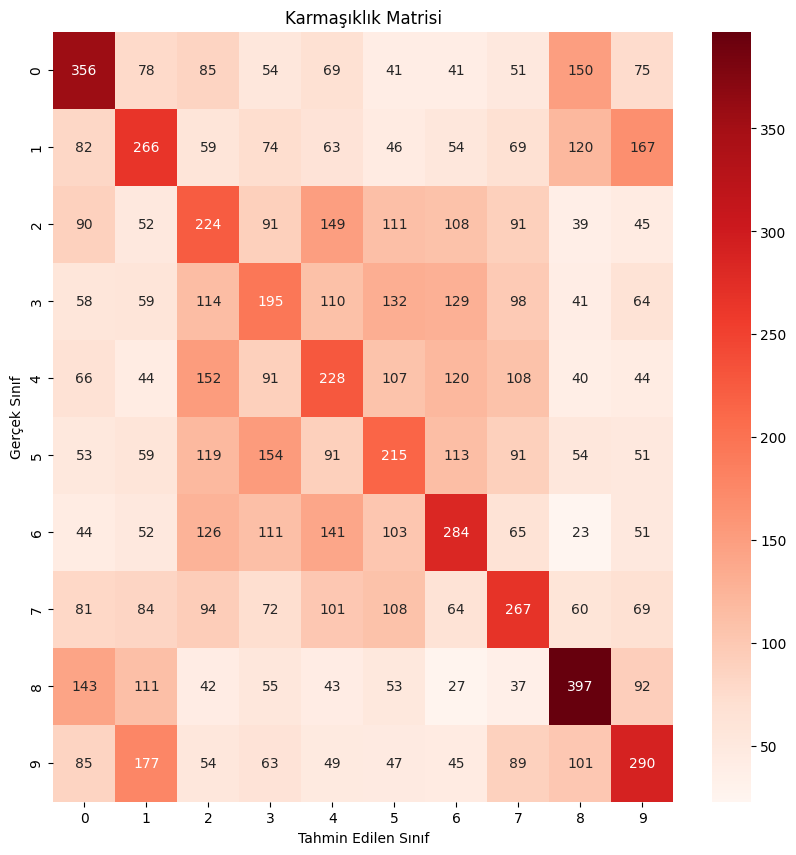

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

#**YAPAY** **SİNİR** **AĞLARI**

In [27]:
#Yapay Sinir Ağları için  Cifar10 datasını tekrar yükleriz

cifar10=tf.keras.datasets.cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [28]:
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32') / 255.0

######-1 yine otomotik olarak uygun değeri belirtilir. -1 yerine direk örnek sayısını yazılabilir.
###### 32*32 boyutlu 1 kanalı görüntüye çevirdik (gray), ayrıca veri tipini float32 yapıp normalize ettik

###### Benzer bir kodda aynı sonucu verir;

######X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32') / 255.0
######X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32') / 255.0

In [29]:
X_train.shape[0]

50000

In [30]:
## classlar(sınıflar) için one hot encoding işlemi (her bir sınıfı bir sütun olarak farklı bir değişkene dönüştürmek) yapalım

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32,3)),
    tf.keras.layers.Dense(15, activation='relu'), #4 sinir ağ ekler
    tf.keras.layers.Dense(20, activation='relu'), #8 sinir ağ eklenir


    tf.keras.layers.Dense(10,activation="softmax") #Çıkış katmanı
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 15)                46095     
                                                                 
 dense_1 (Dense)             (None, 20)                320       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 46625 (182.13 KB)
Trainable params: 46625 (182.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#1. Model Optimizasyonunu Oluşturalım

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [33]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3031 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000


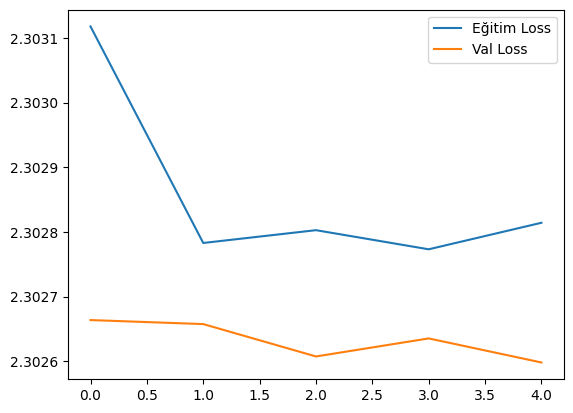

In [34]:
#Loss (Veri) Grafiği
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

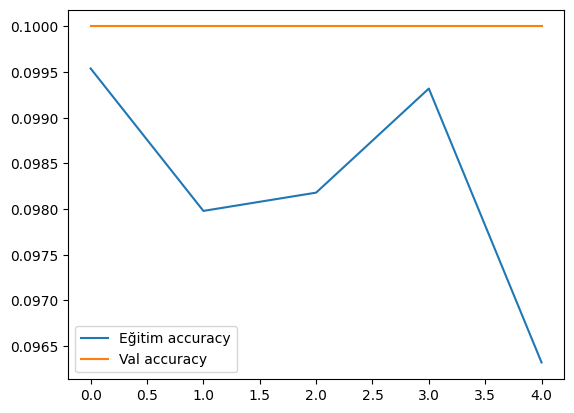

In [35]:
#Arccuracy (Kesinlik) Grafiği
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [36]:
# 2. Model Optimizasyonunu Oluşturalım

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.F1Score()])

In [37]:
#5 defa hata hesaplar

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0975 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0824 - val_loss: 2.3027 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0182
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0982 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0819 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0182
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0999 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0649 - val_loss: 2.3027 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0182
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0999 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_

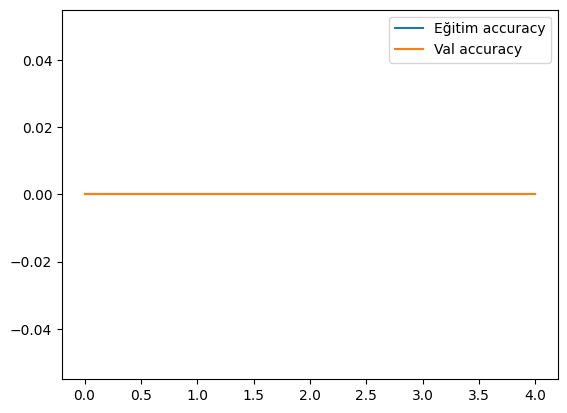

In [38]:
#Precision (Hassasiyet) Grafiği

plt.figure()
plt.plot(hist.history["precision"], label="Eğitim accuracy")
plt.plot(hist.history["val_precision"], label="Val accuracy")
plt.legend()
plt.show()

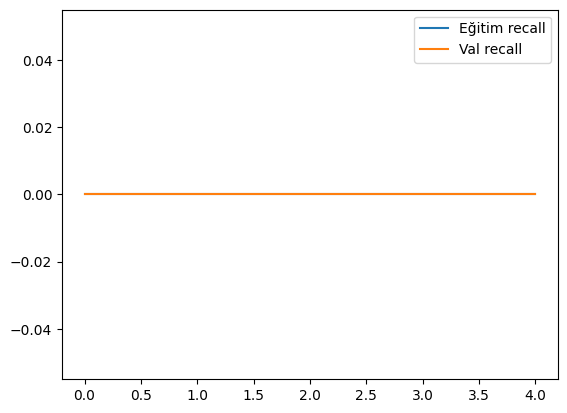

In [39]:
#Recall (Hatırlama) Grafiği

plt.plot(hist.history["recall"], label="Eğitim recall")
plt.plot(hist.history["val_recall"], label="Val recall")
plt.legend()
plt.show()

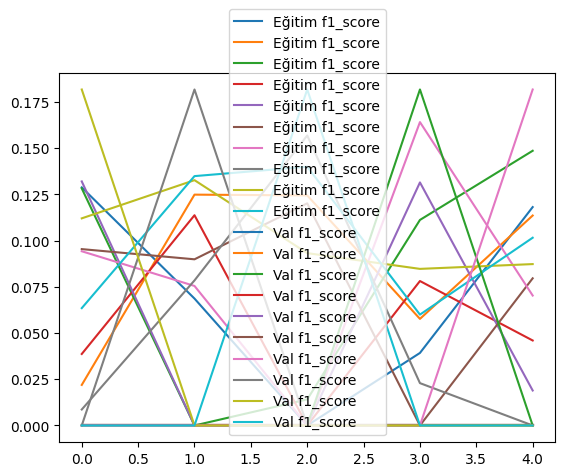

In [40]:
#F1_score Gragiği

plt.plot(hist.history["f1_score"], label="Eğitim f1_score")
plt.plot(hist.history["val_f1_score"], label="Val f1_score")
plt.legend()
plt.show()